Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bW}{\mathbf{W}}$
$\newcommand{\bb}{\mathbf{b}}$
$\newcommand{\ba}{\mathbf{a}}$
$\newcommand{\bz}{\mathbf{z}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$


# Exercício 4: Redes Neurais


Neste exercício você irá implementar e treinar uma rede neural que aproxima a função XOR. O objetivo do exercício é demonstrar a capacidade que as redes neurais possuem de *aprender* automaticamente atributos relevantes para classificação.

O exercício também ilustra a implementação do algoritmo de propagação reversa (*backpropagation*) para cálculo dos gradientes, essencial para a implementação eficiente do treinamento.

Assim como no exercício anterior, para simplificar usaremos somente o conjunto de treinamento.

Lembre que, além da implemenação, você deve incluir também uma **análise** dos resultados. 

# 1. Obtendo o conjunto de dados

Usaremos um conjunto de dados sintético produzido facilmente pela biblioteca `scikit-learn`. Os dados podem ser interpretados como uma versão ruidosa da função XOR.

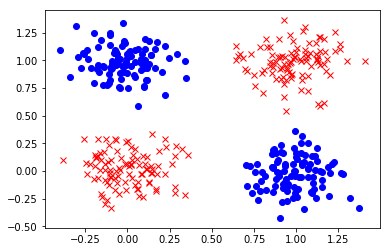

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import sklearn.datasets
%matplotlib inline

m = 400
centers = [[0,0],[0,1],[1,1],[1,0]]
X,y = sklearn.datasets.make_blobs(n_samples=m, n_features=2, centers=centers, cluster_std=0.15, random_state=0)
y = (y % 2 == 0).astype(float)
plt.plot(X[y==0,0],X[y==0,1],'bo',X[y==1,0],X[y==1,1],'rx')

**Obs:** Ao contrário dos exercícios anteriores, aqui a matrix $\bX$ deve conter apenas os atributos originais, pois o termo de _bias_ ($\bb$) é representado separadamente no modelo da rede neural.

# 2. Estrutura do modelo

O modelo será uma rede neural de duas camadas ($L=2$), portanto com uma única camada oculta, a qual deve conter duas unidades ($n_1 = 2$). Os demais tamanhos são determinados pelos dados; portanto, a rede deve possuir uma camada de entrada com duas unidades ($n_0 = 2$), correspondendo ao número de atributos, e uma camada de saída com uma única unidade ($n_2 = 1$), com o objetivo de realizar uma classificação binária.

As funções de ativação, tanto da camada de saída quanto da camada oculta, devem ser do tipo sigmóide, $g(z) = \sigma(z)$.

Como consequência da sua estrutura, o modelo possui um total de 9 parâmetros:
- $\bW^{[1]} = \mat{{\bw_1^{[1]}}^T \\ {\bw_2^{[1]}}^T} = \mat{w_{1,1}^{[1]} & w_{1,2}^{[1]} \\ w_{2,1}^{[1]} & w_{2,2}^{[1]}}$
- $\bb^{[1]} = \mat{b_1^{[1]} \\ b_2^{[1]}}$
- $\bW^{[2]} = \mat{{\bw_1^{[2]}}^T} = \mat{w_{1,1}^{[2]} & w_{1,2}^{[2]}}$
- $\bb^{[2]} = \mat{b_1^{[2]}}$

Internamente, estes parâmetros devem estar representados como um único vetor 1-D, denotado por $\theta$:
$$
\theta = (w^{[1]}_{1,1},w^{[1]}_{1,2},w^{[1]}_{2,1},w^{[1]}_{2,2},b^{[1]}_{1},b^{[1]}_{2},w^{[2]}_{1,1},w^{[2]}_{1,2},b^{[2]}_{1})
$$

# 3. Implementando o modelo

O treinamento da rede neural, implementado pela função `train` fornecida abaixo, envolve os seguintes passos:

1. Inicialização dos parâmetros (vetor $\theta$)
2. Minimização da função custo

Note que, para este exercício, não é necessário normalizar os atributos.

A principal diferença para os exercícios anteriores é a opção `jac=True` na função `minimize`, que indica que o gradiente será calculado na própria função custo (como segundo objeto retornado) ao invés de uma função separada. Isto é importante para reduzir a complexidade, pois todos os passos necessários para calcular o custo são também realizados no cálculo do gradiente, e assim podem ser reaproveitados.

Portanto, a parte central da implementação está na função custo, sendo a etapa mais difícil o cálculo do gradiente, a qual é feita pelo método *backpropagation*. Este método consiste essencialmente da aplicação repetida da regra da cadeia do cálculo diferencial.

Para facilitar a implementação, neste exercício, não é necessário _vetorizar_ o código, isto é, você pode utilizar um laço sobre as amostras do conjunto de treinamento (`for i in range(m):`) para calcular tanto o custo quanto o gradiente.

**Dica:** inicialize $\bw_1^{[1]}$ e $\bw_2^{[1]}$ com valores _diferentes_, caso contrário seus valores tenderão a se manter idênticos durante todo o treinamento.

In [2]:
def train(X, y):
    theta = initialize_parameters()
    theta = opt.minimize(fun=cost, x0=theta, jac=True, args=(X,y), options={'maxiter': 100}).x
    return theta

def merge_parameters(W1, b1, W2, b2):
    return theta

def split_parameters(theta):
    return W1, b1, W2, b2

def initialize_parameters():
    return theta

def cost(theta, X, y):

    # Split theta into W1, b1, W2, b2
    
    # Forward propagation: compute z1, a1, z2, a2

    # Cost: compute J
    
    # Back propagation: compute dJ/dz2, dJ/dW2, dJ/db2, dJ/da1, dJ/dz1, dJ/dW1, dJ/db1
    
    # Merge dJ/dW1, dJ/db1, dJ/dW2, dJ/db2 into grad = dJ/dtheta
    
    return J, grad

def predict_class(theta, X):
    
    # Forward propagation: compute y_hat = a2
    
    y_pred = (y_hat > 0.5).astype(float)
    return y_pred

def accuracy(theta, X, y):
    y_pred = predict_class(theta, X)
    return np.mean(y_pred == y)

## 3.1 Equações do método backpropagation

Para o caso especial de uma rede n_0 x n_1 x 1 (isto é, $L=2$ e $n_2 = 1$):

$$
\frac{\partial J}{\partial z_1^{[2]}} = a_1^{[2]} - y
$$
$$
\frac{\partial J}{\partial z_j^{[1]}} = \frac{\partial J}{\partial z_1^{[2]}} \cdot \frac{\partial z_1^{[2]}}{\partial a_j^{[1]}} \cdot \frac{\partial a_j^{[1]}}{\partial z_j^{[1]}}
$$
$$
\frac{\partial J}{\partial \bw_k^{[\ell]}} = \frac{\partial J}{\partial z_k^{[\ell]}} \cdot \frac{\partial z_k^{[\ell]}}{\partial \bw_k^{[\ell]}}
$$
$$
\frac{\partial J}{\partial b_k^{[\ell]}} = \frac{\partial J}{\partial z_k^{[\ell]}} \cdot \frac{\partial z_k^{[\ell]}}{\partial b_k^{[\ell]}}
$$

# 4. Predição

Avalie a acurácia do modelo no conjunto de treinamento. Você conseguiu obter 100% de acurácia?

Experimente alterar o parâmetro `cluster_std` na geração do conjunto de dados para verificar como o modelo se comporta, bem como alterar o número de amostras. Você pode também alterar o número de iterações no treinamento.

Note que, se desejar usar as funções plotDataset e plotBoundary, estas devem ser adaptadas ao formato usado para a matrix $\bX$ e à função de predição do modelo.

# 4. (OPCIONAL) Outro conjunto de dados

Escolha um outro conjunto de dados bidimensional da sua preferência e tente representá-lo usando a mesma rede neural. Se desejar, você pode aumentar o número de unidades da camada oculta; no entanto, para isso será necessário reimplementar as funções do modelo permitindo um valor arbitrário de $n_2$.